In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing necessary libraries**

In [128]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords

Downloading punkt, vader_lexicon and stopwords

In [129]:
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Loading the Dataset**

Here I am using ***Starbucks Reviews Dataset*** that i took from Kaggle.
This dataset contains a comprehensive collection of consumer reviews and ratings for Starbucks, Which has the features like Name, Location, Date, Rating, Review and Image Links. these are the contents description:

Content:

*   **Name**: The reviewer's name, if available.
*   **Location**: The location or city associated with the reviewer, if provided.
*   **Date**: The date when the review was posted.
*   **Rating**: The star rating given by the reviewer, ranges from 1 to 5.
*   **Review**: The textual content of the review, captures the reviewer's experience and opinions.
*   **Image Link**s: Links to images associated with the reviews, if available.

Link to the dataset: https://www.kaggle.com/datasets/harshalhonde/starbucks-reviews-dataset

In [130]:
df = pd.read_csv('/content/drive/MyDrive/Survey_Sparrow/reviews_data.csv')
df

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images']
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images']
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images']
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images']



*   Image_Links feature is not helpful for our task so I am dropping it
*   Also some Rating columns has no ratings (NaN) and some review column doesn't have reviews (No Review Text), So i am dropping thoses rows

In [131]:
df = df.drop('Image_Links', axis=1)
# Removing rows where Review are "No Review Text" and Rating is "NaN"
df = df[(df['Review'] != "No Review Text") & (df['Rating'].notna())]
df

,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...
...,...,...,...,...,...
700,Margaret,"Cotati, CA","Reviewed Oct. 2, 2011",1.0,I ordered Via Starbucks coffee online. I recei...
701,Ric,"Oakville, ON","Reviewed Aug. 31, 2011",3.0,"My name is Ric **, I am journalist by professi..."
702,Jayne,"Ny, NY","Reviewed Aug. 24, 2011",1.0,"The bagel was ice cold, not cut and not toasted."
703,Norma,"La Puente, CA","Reviewed Aug. 15, 2011",1.0,"In the morning of Monday, August 15, 2011, at ..."


So we can see that shape of the dataset is decreased from 850 rows × 6 columns to 703 rows × 5 columns. Which means 147 rows did'nt had any reviews or ratings

**Function for cleaning the reviews**

1.   Converting all text to lowercase
2.   Removing special characters and digits
3.   Removing extra whitespaces containing






In [132]:
# Function for cleaning reviews
def clean_text(text):
    # Converting to lowercase
    text = text.lower()
    # Removing special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Removing extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [133]:
# Cleaning the reviews
df['corpus'] = df['Review'].apply(clean_text)

In [134]:
# Removing the stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    return ' '.join([word for word in words if word not in stop_words])

In [135]:
df['corpus'] = df['corpus'].apply(remove_stopwords)

In [136]:
# Function to extract key phrases (bigrams)
def extract_key_phrases(text):
    words = nltk.word_tokenize(text)
    bigrams = list(nltk.bigrams(words))
    return [' '.join(bigram) for bigram in bigrams]

In [137]:
# Extracting the key phrases from cleaned reviews
df['key_phrases'] = df['corpus'].apply(extract_key_phrases)

In [138]:
# Flattening the list of key phrases
all_phrases = [phrase for phrases in df['key_phrases'] for phrase in phrases]

In [139]:
# Counting the frequency of each phrase
phrase_counts = pd.Series(all_phrases).value_counts()

In [140]:
# Selecting only top 20 most frequent phrases
top_phrases = phrase_counts.head(20)

In [141]:
# Initializing sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [142]:
# Function for calculating sentiment using polarity scores
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

In [143]:
# Function for categorizing sentiment into 3 categories
def categorize_sentiment(score):
    if score <= -0.05: # polarity score less than or equal to -0.05 will be classified as Negative category
        return 'Negative'
    elif score >= 0.05: #similarly polarity sore morethan or equal to 0.05 will be classified as Positvie category
        return 'Positive'
    else:
        return 'Neutral'

In [144]:
# Calculating the sentiment for each review
df['sentiment_score'] = df['corpus'].apply(get_sentiment)
df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

In [145]:
# Calculating average sentiment score and category distribution for each key phrases
phrase_sentiments = {}
phrase_categories = {}
for phrase in top_phrases.index:
    mask = df['key_phrases'].apply(lambda x: phrase in x)
    phrase_sentiments[phrase] = df.loc[mask, 'sentiment_score'].mean()
    categories = df.loc[mask, 'sentiment_category'].value_counts(normalize=True)
    phrase_categories[phrase] = categories.to_dict()


**As Initial part of the task, i did these techniques on the dataset**
*   Removed stopwords
*   Extracted key phrases from cleaned reviews
*   Flattened the list of key phrases
*   Counted the frequency of each phrase
*   Selected only top 20 most frequent phrases
*   Initialized sentiment analyzer
*   calculated sentiment using polarity scores
*   categorized sentiment into 3 categories
*   Calculated the sentiment for each review
*   Calculated average sentiment score and category distribution for each key phrases








As a result we got pretty cleaned and decent datset.
now we having Cleaned_Review column where texts are ready to use NLP techniques, We additionally included the key_phrases column for future use, Sentiment score of the each instances are noted in a new column and finally we have now sentiment category where each sentiment are classified in to 3 categories

In [146]:
df

,name,location,Date,Rating,Review,corpus,key_phrases,sentiment_score,sentiment_category
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,amber ladonna starbucks southwest parkway alwa...,"[amber ladonna, ladonna starbucks, starbucks s...",0.8779,Positive
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,starbucks fire station altamonte springs fl ma...,"[starbucks fire, fire station, station altamon...",0.9670,Positive
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,wanted go way recognize starbucks employee bil...,"[wanted go, go way, way recognize, recognize s...",0.4215,Positive
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,friend starbucks card didnt work thankful work...,"[friend starbucks, starbucks card, card didnt,...",0.9028,Positive
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,im kick drinking cups warm water work instacar...,"[im kick, kick drinking, drinking cups, cups w...",0.9714,Positive
...,...,...,...,...,...,...,...,...,...
700,Margaret,"Cotati, CA","Reviewed Oct. 2, 2011",1.0,I ordered Via Starbucks coffee online. I recei...,ordered via starbucks coffee online received e...,"[ordered via, via starbucks, starbucks coffee,...",-0.1779,Negative
701,Ric,"Oakville, ON","Reviewed Aug. 31, 2011",3.0,"My name is Ric **, I am journalist by professi...",name ric journalist profession im sending lett...,"[name ric, ric journalist, journalist professi...",-0.2960,Negative
702,Jayne,"Ny, NY","Reviewed Aug. 24, 2011",1.0,"The bagel was ice cold, not cut and not toasted.",bagel ice cold cut toasted,"[bagel ice, ice cold, cold cut, cut toasted]",-0.2732,Negative
703,Norma,"La Puente, CA","Reviewed Aug. 15, 2011",1.0,"In the morning of Monday, August 15, 2011, at ...",morning monday august coworker stopped starbuc...,"[morning monday, monday august, august coworke...",0.0000,Neutral


**Reverifying the features**

In [147]:
df.Date.head()

0    Reviewed Sept. 13, 2023
1     Reviewed July 16, 2023
2      Reviewed July 5, 2023
3      Reviewed May 26, 2023
4     Reviewed Jan. 22, 2023
Name: Date, dtype: object

In [148]:
df.Rating.value_counts(), df.Date.value_counts(),

(Rating
 1.0    450
 2.0     98
 5.0     83
 4.0     39
 3.0     33
 Name: count, dtype: int64,
 Date
 Reviewed Sept. 14, 2017    4
 Reviewed Aug. 25, 2017     3
 Reviewed Sept. 3, 2017     3
 Reviewed Sept. 1, 2017     3
 Reviewed Aug. 31, 2017     3
                           ..
 Reviewed Nov. 29, 2018     1
 Reviewed Dec. 2, 2018      1
 Reviewed Dec. 5, 2018      1
 Reviewed Dec. 7, 2018      1
 Reviewed Feb. 6, 2010      1
 Name: count, Length: 608, dtype: int64)

In [149]:
df.Rating.unique()

array([5., 1., 2., 3., 4.])

In [150]:
df.isnull().value_counts()

name   location  Date   Rating  Review  corpus  key_phrases  sentiment_score  sentiment_category
False  False     False  False   False   False   False        False            False                 703
Name: count, dtype: int64

In [151]:
df.location.isnull().value_counts()

location
False    703
Name: count, dtype: int64

In [152]:
df.shape

(703, 9)

# **EDA**

**Average rating recieved to the Starbucks,**
from the given ratings i found that the avg rating that Starbucks recieved from the customers is **1.87**

In [153]:
#Avg rating to the starbucks
df.Rating.mean()

1.871977240398293

For the deeper insights, I checked category wise count of the reviews.

In [154]:
#getting the count of the reviews by each category
positive_count = df['sentiment_category'].value_counts()['Positive']
negative_count = df['sentiment_category'].value_counts()['Negative']
neutral_count = df['sentiment_category'].value_counts()['Neutral']

print(f"Positive reviews: {positive_count}")
print(f"Negative reviews: {negative_count}")
print(f"Neutral reviews: {neutral_count}")

Positive reviews: 386
Negative reviews: 282
Neutral reviews: 35


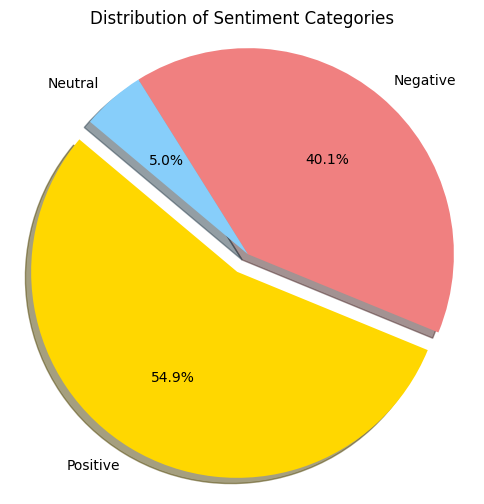

In [155]:
# Data to plot
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Distribution of Sentiment Categories')
plt.show()

So from this analysis, we can see that 54.9 percent of the customers are positively reviewed, 40.1 percent of the customers are not satisfied and 5.0 percent customers stand neutral

So we can check total count of each ratings that is 1 to 5 ratings, so we can get better insights

Text(0.5, 0.98, 'Counts for each ratings')

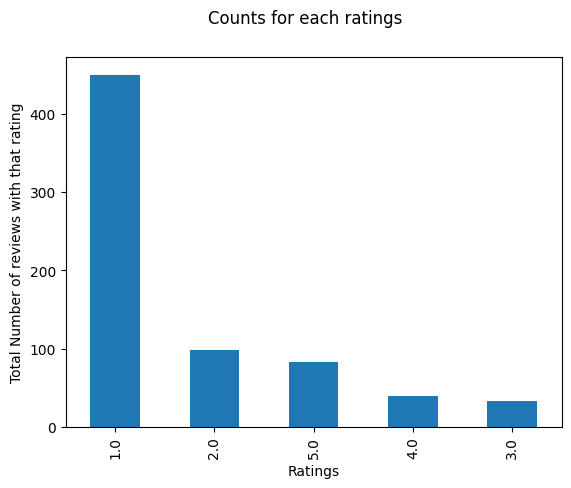

In [156]:
# What is the total counts for each ratings?
df.Rating.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

Thus, we can find that we have more number of rating 1 and 2 compare to others, Which points that most of teh customers are not satisfied, so we can go deeper and get the insights

In [157]:
# Creating a DataFrame with rating counts
df_ratings = pd.DataFrame(df.Rating.value_counts().sort_index())
df_ratings.columns = ['count']

In [158]:
# Calculating the percentage values
pct_values = (df_ratings['count'] / df_ratings['count'].sum() * 100).round(2)
df_ratings['percentage'] = pct_values

In [159]:
# Sort the DataFrame by rating in descending order
df_ratings = df_ratings.sort_index(ascending=False)
df_ratings

,count,percentage
Rating,,
5.0,83,11.81
4.0,39,5.55
3.0,33,4.69
2.0,98,13.94
1.0,450,64.01


so from the above dataframe we created we can understand that 64.01 percent of the reviews gave rating 1, That is 450
we can visualize the data, so we will get the insight

<ipython-input-160-e2d9198b2d46>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_ratings.index, y='count', data=df_ratings, palette=clrs)


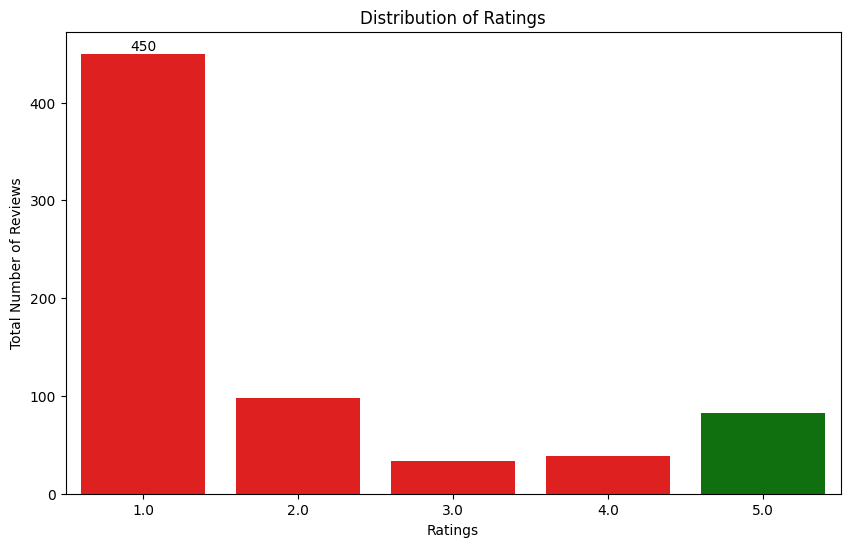

In [160]:
# Create a color list, red for the most common rating, grey for others
clrs = ['Green' if x == df_ratings['count'].max()  else 'Red' for x in df_ratings['count']]
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_ratings.index, y='count', data=df_ratings, palette=clrs)
ax.bar_label(ax.containers[0])
# Set labels and title
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of Reviews")
ax.set_title("Distribution of Ratings")

# Display the plot
plt.show()

So as a next step we can check about locations

In [161]:
# Unique locations that Starbucks recieved the reviews from

print(f"{len(df.location.unique())} unique locations")

536 unique locations


We got to know that 536 unique locations are there, So we'll find out the locations that recieved most of the reviews

In [162]:
#Which locations most review comes from?
df_location_review = pd.DataFrame(df['location'].value_counts().head(10)).reset_index()
df_location_review.columns = ['location', 'total_reviews']
df_location_review

,location,total_reviews
0,"New York, NY",11
1,"Seattle, WA",10
2,"Los Angeles, CA",9
3,"Chicago, IL",8
4,"Las Vegas, NV",6
5,"Phoenix, AZ",6
6,"Denver, CO",6
7,"Jacksonville, FL",6
8,"Toronto, ON",5
9,"Eugene, OR",4


will plot a bar plot accordingly

<Figure size 1200x600 with 0 Axes>

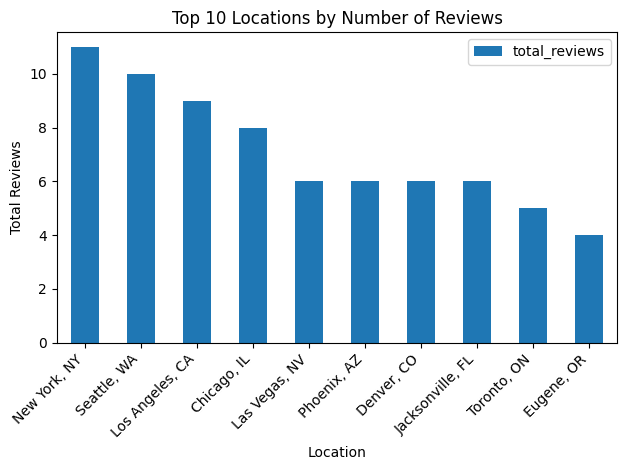

In [163]:
# Create the bar plot
plt.figure(figsize=(12, 6))
df_location_review.plot(kind="bar", x='location', y='total_reviews')
plt.title("Top 10 Locations by Number of Reviews")
plt.xlabel("Location")
plt.ylabel("Total Reviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We can also find the average ratings by the locations, from this we can understand that what are the locations those are performing well and what are the location that we can focus more for increasing the performance

In [164]:
# Calculate average rating by location
df_location_rating = df.groupby('location')['Rating'].mean().sort_values(ascending=False).reset_index()
df_location_rating.columns = ['location', 'avg_rating']
df_location_rating

,location,avg_rating
0,"Littleton, CO",5.0
1,"Macon, GA",5.0
2,"San Marcos, CA",5.0
3,"Hawthorne, CA",5.0
4,"San Diego, California",5.0
...,...,...
531,"Joliet, IL",1.0
532,"Johnson City, TN",1.0
533,"Jersey City, NJ",1.0
534,"Jackson, MS",1.0


Now we focus on least ratings recieved locations, Considering below 2 ratings.
That is 336 of the locations are recieved an avg rating of below 2.

In [165]:
# Calculate average rating by location
df_location_rating = df.groupby('location')['Rating'].mean().reset_index()
# Filter out the locations with average rating less than 2
low_rated_locations = df_location_rating[df_location_rating['Rating'] < 2].sort_values('Rating')
print("Locations with average rating below 2:")
print(low_rated_locations)

Locations with average rating below 2:
          location    Rating
0        93720, ca  1.000000
362  Pensacola, FL  1.000000
359   Pearland, TX  1.000000
356   Panorama, CA  1.000000
355   Palmdale, CA  1.000000
..             ...       ...
252  Las Vegas, NV  1.666667
381   Portland, OR  1.666667
326   New York, NY  1.727273
211    Houston, TX  1.750000
146     Eugene, OR  1.750000

[336 rows x 2 columns]


***So we find the locations where Starbucks recieved bad customer reviews, so they can check the performance of the shop and improve the customer experience***

So we can try to find the reasons that customers gave bad reviews or not satisfied

here we can generate a word cloud image to analyse the review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


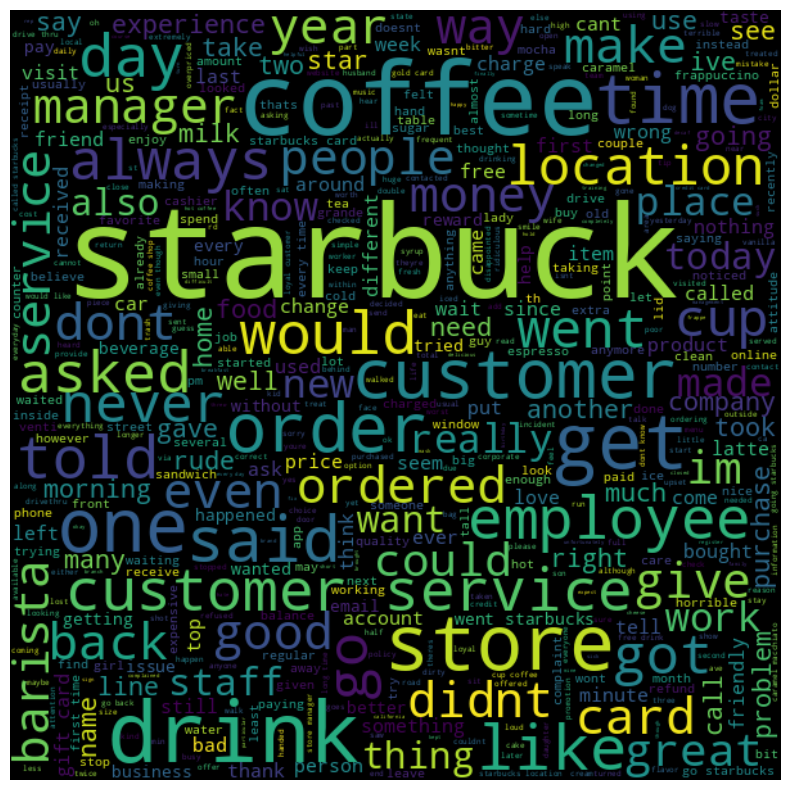

In [166]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

# Define stopwords
stopwords = set(stopwords.words('english'))

# Join all reviews into a single string
reviews = ' '.join(df.corpus.tolist())

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

So these are the key phrases where most of the reviews recieved
let's remove some phrases that doesn't tell us anything about the sentiment

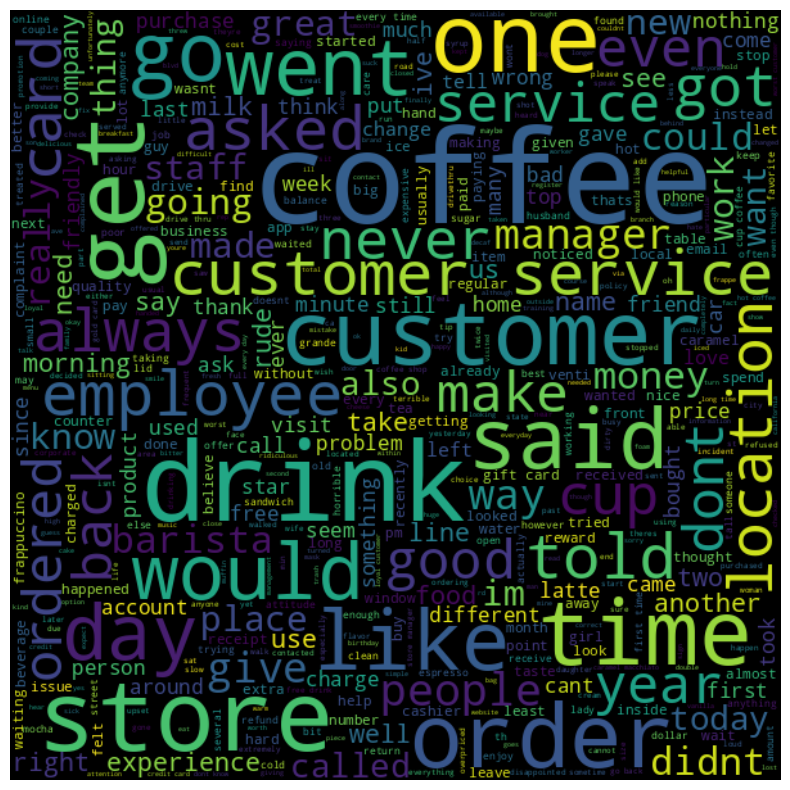

In [168]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Define stopwords
stopwords = set(stopwords.words('english'))
stopwords.update(["Starbucks"]) #here i removed the phrase starbucks, we can update it as we need

# Join all reviews into a single string
reviews = ' '.join(df.corpus.tolist())

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

So from this word cloud, we can understand these are some phrases that we want to consider

*   Coffee
*   drink
*   location
*   Employee
*   Cup
*   Order
*   Money
*   Service
*   Manager
*   Attitude
*   Customer
*   Samdwitch

and more






# **Checking Word Frequency**

In [169]:
# Word Frequency
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['Starbucks', 'starbucks', 'SB'])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'coffee'),
  Text(1, 0, 'customer'),
  Text(2, 0, 'service'),
  Text(3, 0, 'drink'),
  Text(4, 0, 'store'),
  Text(5, 0, 'time'),
  Text(6, 0, 'like'),
  Text(7, 0, 'order'),
  Text(8, 0, 'said'),
  Text(9, 0, 'card'),
  Text(10, 0, 'went'),
  Text(11, 0, 'told'),
  Text(12, 0, 'asked'),
  Text(13, 0, 'got'),
  Text(14, 0, 'dont'),
  Text(15, 0, 'ordered'),
  Text(16, 0, 'manager'),
  Text(17, 0, 'day'),
  Text(18, 0, 'customers'),
  Text(19, 0, 'cup')])

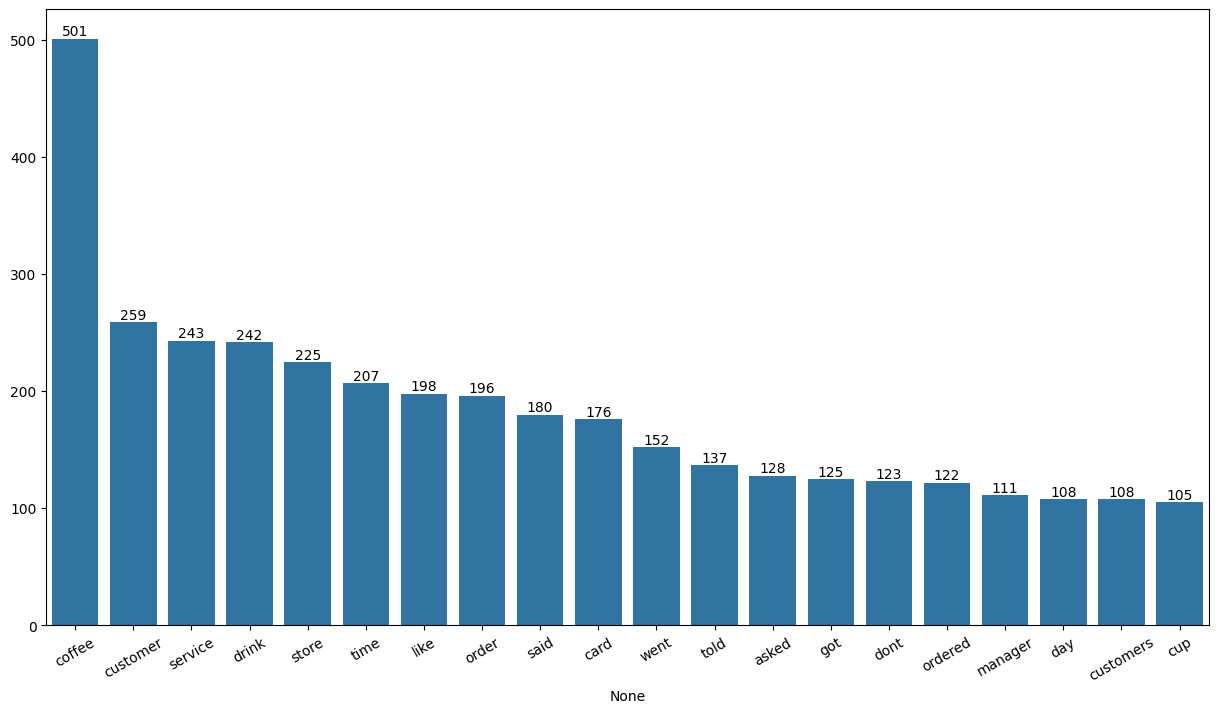

In [170]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

as we see Coffee, customers, service,.... are frequently occured
So analyze the text data by generating and visualizing the most common 4-word sequences (quadgrams), after removing common stopwords.

<Axes: >

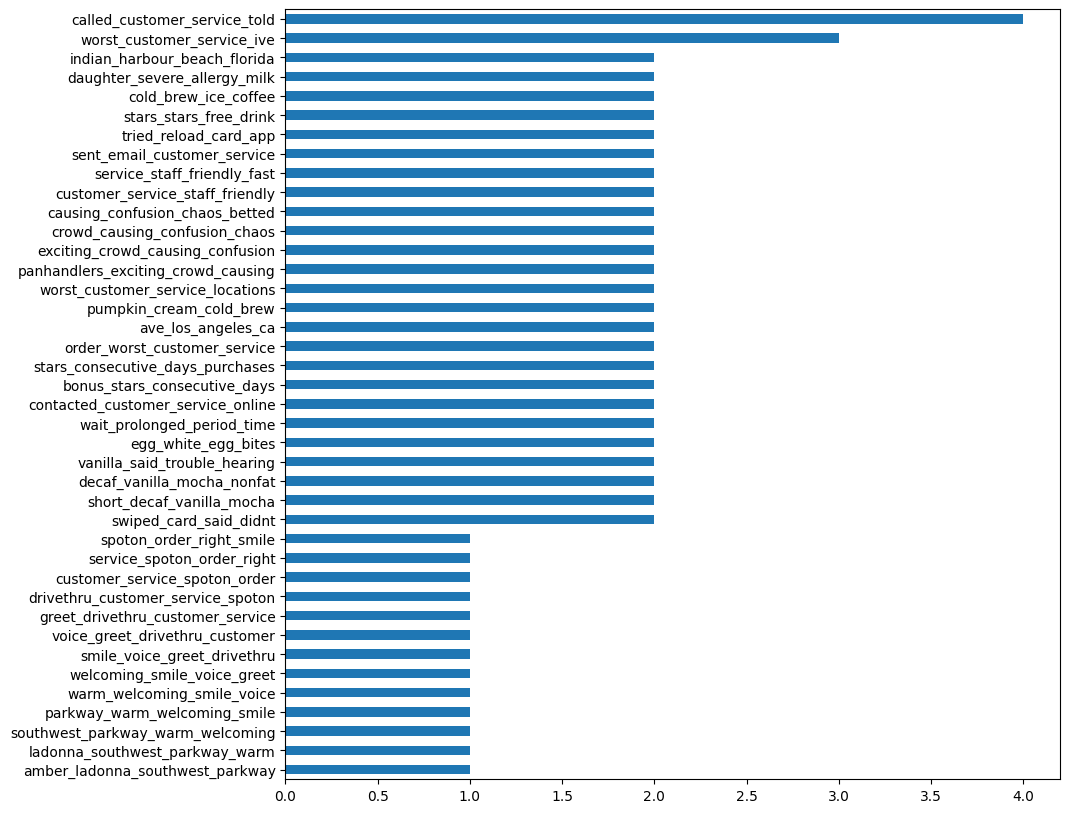

In [171]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams

    # Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    # Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    # Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    # Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    # Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax


get_freq_dist(new_words,4)


Here I am creating 2 categories
*   Rating 1 to 3 (Comparatively bad performance, where we can focus)
*   Rating 4 and 5 (Performing well we can also check and impove)

In [172]:
ratings_1_3 = df[df.Rating.isin([1,2,3])]
ratings_4_5 = df[df.Rating.isin([4,5])]

<Axes: >

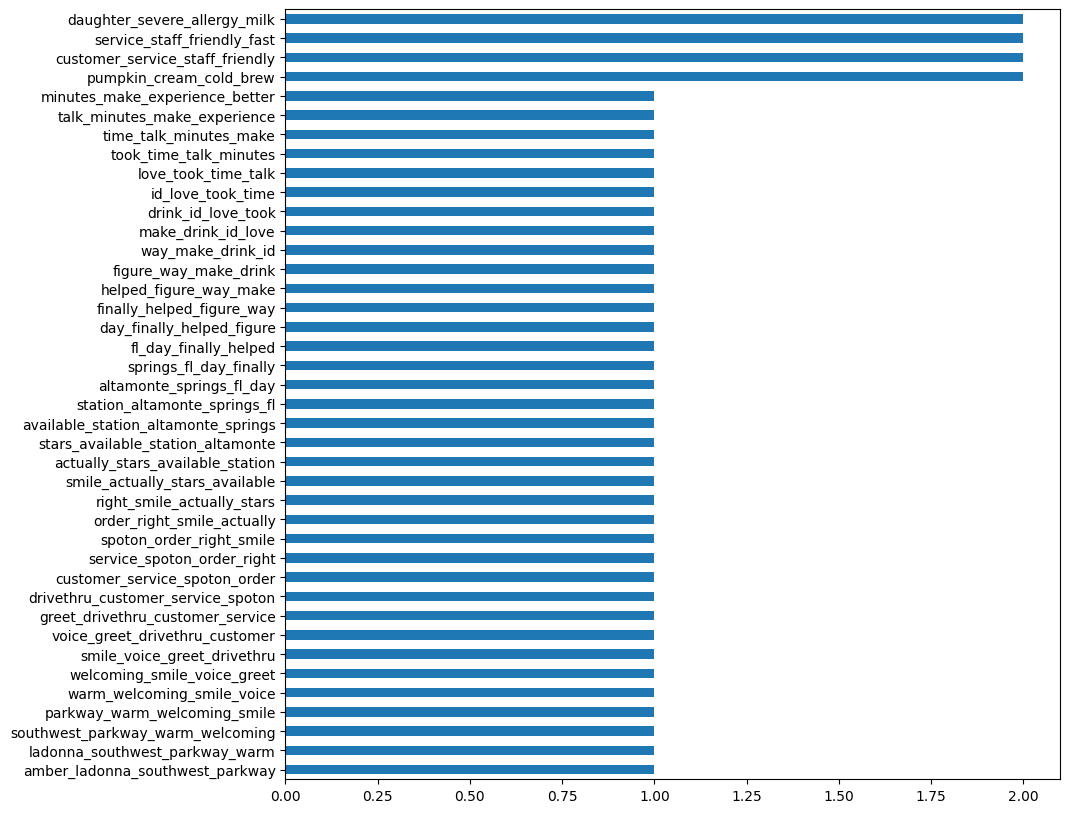

In [174]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_5 = " ".join(ratings_4_5.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_5 = reviews_4_5.split(" ")


new_words_4_5 = [word for word in words_4_5 if word not in stopwords]

get_freq_dist(new_words_4_5,4)

Above is the frequesntly occured 4-word sequences (quadgrams) of Rating of 4 and 5

<Axes: >

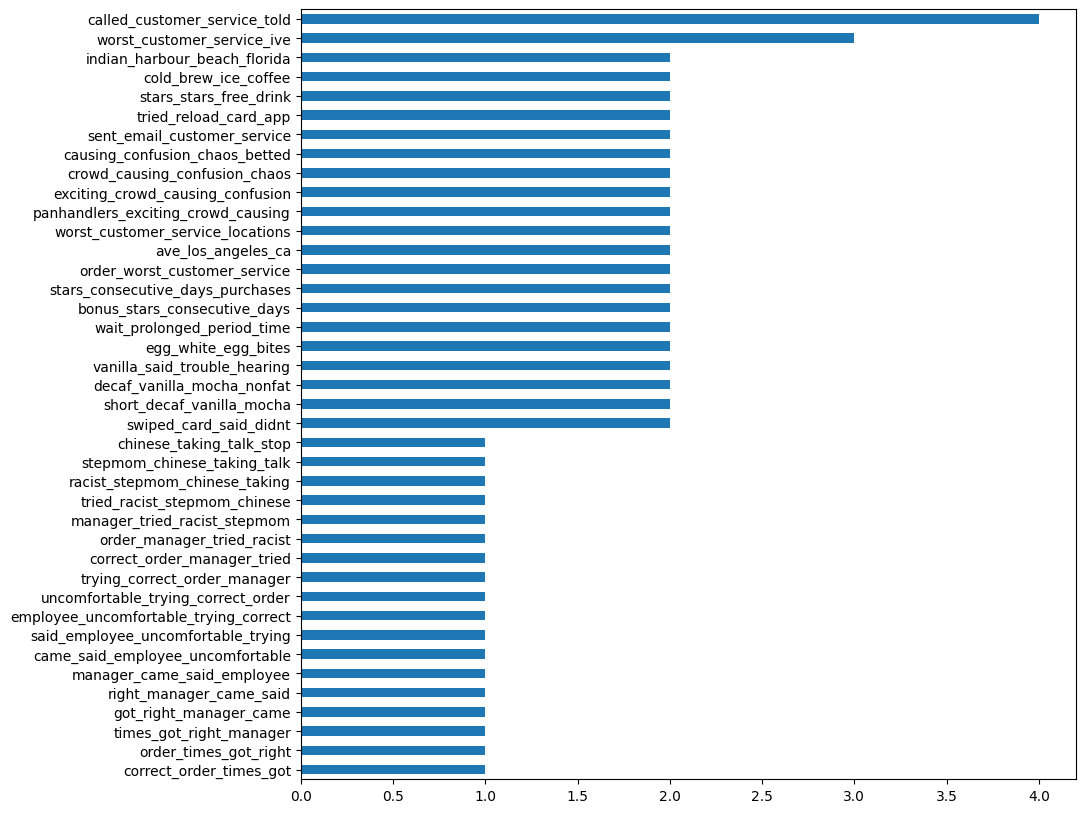

In [175]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

Above is Rating of 1 to 3, Where customers are not satisfied

In [177]:
# Keyword and importance
def keyword_and_importance(df):
    positive_keywords = df[df['Sentiment'] > 0.05].nlargest(5, 'Importance')
    negative_keywords = df[df['Sentiment'] < -0.05].nlargest(5, 'Importance')

    print("Top Positive Keywords:")
    print(positive_keywords[['Keyword', 'Importance']])

    print("\nTop Negative Keywords:")
    print(negative_keywords[['Keyword', 'Importance']])

keyword_and_importance(importance_df)

Top Positive Keywords:
   Keyword  Importance
36    good   18.072951
38   great   17.741618
52    many    6.667556
30    free    6.016766
28   first    3.787723

Top Negative Keywords:
   Keyword  Importance
72    rude    -4.77827
6      bad    -8.59972


# **Actionable Insights**

From these analysis, we can undersatnd that,

*   Most of the bad reviews are about customer service, so it's better focus on that. Reviews are mostly mentioning about the Employee and manager behaviour, Waiting time, Payment process, Taking of order and misplacement, Over crowded shop.
*   Most of the good reviews are also about the good behaviour of employees and managers, Food, drink, Discounts.



So that it is better to work on

*   Employees and managers behaviour towards the customers
*   Product quality
*   Correct order taking
*   Location of the store
*   Over crowding of the store
*   payment systems






